# Proyecto Final

##### Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

##### Interconnect proporciona principalmente dos tipos de servicios:

##### 1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
##### 2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

##### Algunos otros servicios que ofrece la empresa incluyen:

##### - Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
##### - Una línea de soporte técnico (*SoporteTécnico*).
##### - Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
##### - Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

##### La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### 1) Analisis de datos

#### a) Cargar Datos y librerias

In [1]:
#Se importan librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
#Se cargan los DataFrame
contract = pd.read_csv("contract.csv")
internet = pd.read_csv("internet.csv")
personal = pd.read_csv("personal.csv")
phone = pd.read_csv("phone.csv")

#### b) Limpieza de datos

In [3]:
#Se muestra la informacion y head del DataFrame "contract"

print(contract.head())
print()
print(contract.info())

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Co

In [4]:
#Se asegura que el DF no tenga valores nulos y duplicados
print(f'Valores nulos: \n \n{contract.isnull().sum()}')
print()
print(f'Valores duplicado: {contract.duplicated().sum()}')

Valores nulos: 
 
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Valores duplicado: 0


In [5]:
#Se muestra la informacion y head del DataFrame "internet"
print(internet.head())
print()
print(internet.info())
print()

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService  

In [6]:
#Se asegura que el DF no tengo valores nulos o duplicados
print(f'Valores nulos: \n \n{internet.isnull().sum()}')
print()
print(f'Valores duplicado: {internet.duplicated().sum()}')

Valores nulos: 
 
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Valores duplicado: 0


In [7]:
#Se muestra la informacion y head del DataFrame "personal"

print(personal.head())
print()
print(personal.info())

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


In [8]:
#Se asegura que el DF no tengo valores nulos o duplicados
print(f'Valores nulos: \n \n{personal.isnull().sum()}')
print()
print(f'Valores duplicado: {personal.duplicated().sum()}')

Valores nulos: 
 
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Valores duplicado: 0


In [9]:
#Se muestra la informacion y head del DataFrame "phone"

print(phone.head())
print()
print(phone.info())

   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


In [10]:
#Se asegura que el DF no tengo valores nulos o duplicados
print(f'Valores nulos: \n \n{phone.isnull().sum()}')
print()
print(f'Valores duplicado: {phone.duplicated().sum()}')

Valores nulos: 
 
customerID       0
MultipleLines    0
dtype: int64

Valores duplicado: 0


##### No existen valores duplicados ni nulos, por lo que se puede proceder a la union de los DataFrame.

#### c) Union de datos

In [11]:
#Se une "Contract" e "Personal" en "df_1"

df_1 = contract.merge(personal, on='customerID')
print(df_1.head())

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   gender  SeniorCitizen Partner Dependents  
0  Female              0     Yes         No  
1    Male              0      No         N

In [12]:
#Se obtiene la informacion del df_1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 660.4+ KB


In [13]:
#Se une "df_1" con "internet" en "df_2"

df_2 = df_1.merge(internet, on='customerID', how = 'outer')
print(df_2.head())

   customerID   BeginDate              EndDate            Type  \
0  0002-ORFBO  2019-05-01                   No        One year   
1  0003-MKNFE  2019-05-01                   No  Month-to-month   
2  0004-TLHLJ  2019-09-01  2020-01-01 00:00:00  Month-to-month   
3  0011-IGKFF  2018-12-01  2020-01-01 00:00:00  Month-to-month   
4  0013-EXCHZ  2019-09-01  2019-12-01 00:00:00  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges  gender  \
0              Yes      Mailed check            65.6        593.3  Female   
1               No      Mailed check            59.9        542.4    Male   
2              Yes  Electronic check            73.9       280.85    Male   
3              Yes  Electronic check            98.0      1237.85    Male   
4              Yes      Mailed check            83.9        267.4  Female   

   SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
0              0     Yes        Yes             DSL             No   


In [14]:
#Se obtiene la informacion del df_2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [15]:
#Se une "df_2" con "phone" en "df"

df = df_2.merge(phone, on='customerID', how='outer')
print(df.head())

   customerID   BeginDate              EndDate            Type  \
0  0002-ORFBO  2019-05-01                   No        One year   
1  0003-MKNFE  2019-05-01                   No  Month-to-month   
2  0004-TLHLJ  2019-09-01  2020-01-01 00:00:00  Month-to-month   
3  0011-IGKFF  2018-12-01  2020-01-01 00:00:00  Month-to-month   
4  0013-EXCHZ  2019-09-01  2019-12-01 00:00:00  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges  gender  \
0              Yes      Mailed check            65.6        593.3  Female   
1               No      Mailed check            59.9        542.4    Male   
2              Yes  Electronic check            73.9       280.85    Male   
3              Yes  Electronic check            98.0      1237.85    Male   
4              Yes      Mailed check            83.9        267.4  Female   

   SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
0              0     Yes        Yes             DSL             No   


In [16]:
#Se obtiene la informacion de 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


##### Se puede observar que hay varios clientes que no cuentan con servicios adicionales como lo son 'internet' y 'phone' por lo que tenemos valores nulos, los mantenemos ya que son importantes para nuestro analisis.
##### De igual manera se observan que existen datos numericos que se encuentran como 'object' por lo que hay que modificar su tipo de dato.

#### c) Manejo de Nulos y Ausentes y tipos de datos

In [17]:
#Se llenan valores ausentes

df['InternetService'] = df['InternetService'].fillna('No')
df['OnlineSecurity'] = df['OnlineSecurity'].fillna('No')
df['OnlineBackup'] = df['OnlineBackup'].fillna('No')
df['DeviceProtection'] = df['DeviceProtection'].fillna('No')
df['TechSupport'] = df['TechSupport'].fillna('No')
df['StreamingTV'] = df['StreamingTV'].fillna('No')
df['StreamingMovies'] = df['StreamingMovies'].fillna('No')
df['MultipleLines'] = df['MultipleLines'].fillna('No')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


In [19]:
#Se cambia la columna "TotalCharge" a tipo 'float64'

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [20]:
#Se cambia la columna "BeginDate" a tipo 'datetime'

df['BeginDate'] = pd.to_datetime(df['BeginDate'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

##### Para evitar perder datos de los clientes que no cuentan con todos los servicios y que nuestro entrenamiento mejore, se procedio a llenar los valores faltantes.

#### d) Columnas nuevas

In [22]:
#Tranformamos los datos 'No' a 'NaN'
df['EndDate'] = df['EndDate'].replace('No', np.nan)

#Se tranforman los datos EndDate a tipo 'datetime' 
df['EndDate'] = pd.to_datetime(df['EndDate'])

In [23]:
#Se crea una columna para saber si un cliente esta activo o no

df['ActiveCustomer'] = df['EndDate'].isna() 

##### Con la columna nueva "ActiveCustomer" podremos saber que clientes se encuentran activos

#### e) Visualizacion de datos

#### e.1) Distribucion de clientes Activos vs Inactivos

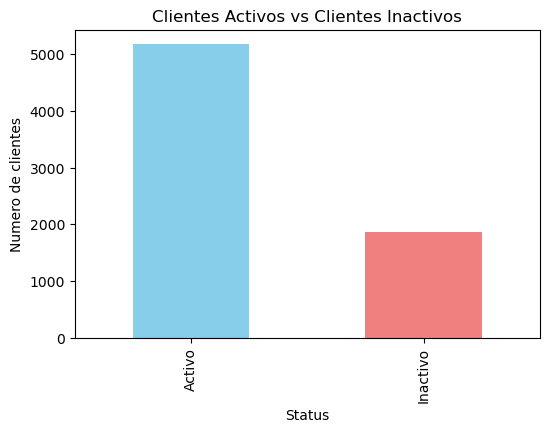

In [24]:
# Distribucion de clientes Activos vs Inactivos

plt.figure(figsize = (6,4))
df['ActiveCustomer'].value_counts().plot(kind='bar', color = ['skyblue', 'lightcoral'])
plt.title('Clientes Activos vs Clientes Inactivos')
plt.xlabel('Status')
plt.ylabel('Numero de clientes')
plt.xticks([0, 1], ['Activo', 'Inactivo'])
plt.show()


##### Se puede observar que casi 2000 clientes han abandonado su servicio, y siguen activos mas de 5000 clientes, esto quiere decir que de los 7000 clientes aproximados que tuvo la compañia, cerca de un 30% ha cancelado sus servicios

##### 

#### e.2) Distribucion de cargos mensuales y cargos totales

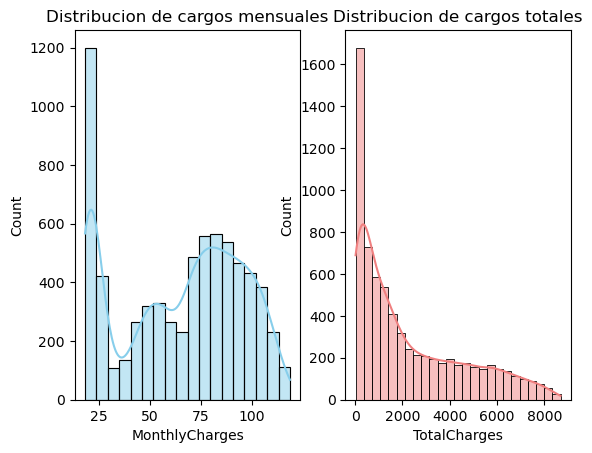

In [25]:
# Distribucion de "MontlyCharges" y "TotalCharges"

plt.figsize = (12, 5)
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True, color = 'Skyblue')
plt.title('Distribucion de cargos mensuales')

plt.subplot(1, 2, 2)
sns.histplot(df['TotalCharges'].dropna(), kde=True, color= 'lightcoral')
plt.title('Distribucion de cargos totales')
plt.show()

##### Podemos observar que existen 2 grupos bien marcados con cargos mensuales, por lo que podemos deducir que existen diversos precios para los diferentes planes.
##### La mayoria de los clientes tienen cargos totales bajos, lo que podria indicar que tienen planes economicos, o son clientes nuevos.
##### Los clientes con cargos totales altos son clientes leales o con servicios premium, lo que los convierte en un grupo a retener.

#### e.3) Distribucion de clientes por tipo de contrato

/var/folders/tl/svswzrd161q7xy22grsvz20h0000gn/T/ipykernel_48528/1095025498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='pastel')


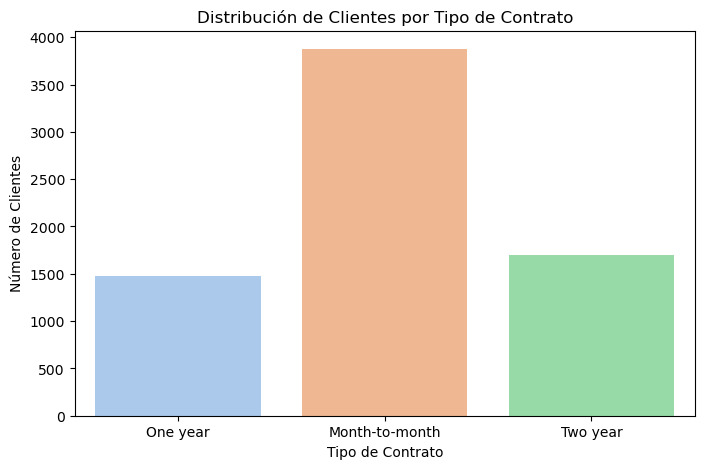

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=df, palette='pastel')
plt.title('Distribución de Clientes por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

##### Se puede observar que la mayoria de clientes prefieren pagar su contrato mensualmente, seguidos del grupo que prefiere pagarlo adelantados por 2 años que deben tener mayores beneficios, y en ultimo lugar se encuentran los clientes que lo pagan anualmente.

### 2) Preprocesamiento de datos

#### a) Eliminacion de columnas 

In [27]:
#Se elimina variables que no aportan a nuestro entrenamiento
df = df.drop(columns = ['customerID'])


In [28]:

df = df.drop(columns = ['BeginDate', 'EndDate'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  MultipleLines     7043 non-null   object 


##### Las columnas eliminadas no aportan valor a nuestro modelo, por lo que se las elimina.

#### b) Codificacion de variables categoricas con One-hot encoding 

In [30]:
#Se utiliza One-hot encoding
df = pd.get_dummies(df, columns = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents',
                                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                   'StreamingMovies', 'MultipleLines'], drop_first=True)

In [31]:
#Se cambia el tipo de datos de 'bol' a 'int'
df['ActiveCustomer'] = df['ActiveCustomer'].astype('int')
df['Type_One year'] = df['Type_One year'].astype('int')
df['Type_Two year'] = df['Type_Two year'].astype('int')
df['PaperlessBilling_Yes'] = df['PaperlessBilling_Yes'].astype('int')
df['PaymentMethod_Credit card (automatic)'] = df['PaymentMethod_Credit card (automatic)'].astype('int')
df['PaymentMethod_Electronic check'] = df['PaymentMethod_Electronic check'].astype('int')
df['PaymentMethod_Mailed check'] = df['PaymentMethod_Mailed check'].astype('int')
df['gender_Male'] = df['gender_Male'].astype('int')
df['Partner_Yes'] = df['Partner_Yes'].astype('int')
df['Dependents_Yes'] = df['Dependents_Yes'].astype('int')
df['InternetService_Fiber optic'] = df['InternetService_Fiber optic'].astype('int')
df['InternetService_No'] = df['InternetService_No'].astype('int')
df['OnlineSecurity_Yes'] = df['OnlineSecurity_Yes'].astype('int')
df['OnlineBackup_Yes'] = df['OnlineBackup_Yes'].astype('int')
df['DeviceProtection_Yes'] = df['DeviceProtection_Yes'].astype('int')
df['TechSupport_Yes'] = df['TechSupport_Yes'].astype('int')
df['StreamingTV_Yes'] = df['StreamingTV_Yes'].astype('int')
df['StreamingMovies_Yes'] = df['StreamingMovies_Yes'].astype('int')
df['MultipleLines_Yes'] = df['MultipleLines_Yes'].astype('int')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   TotalCharges                           7032 non-null   float64
 2   SeniorCitizen                          7043 non-null   int64  
 3   ActiveCustomer                         7043 non-null   int64  
 4   Type_One year                          7043 non-null   int64  
 5   Type_Two year                          7043 non-null   int64  
 6   PaperlessBilling_Yes                   7043 non-null   int64  
 7   PaymentMethod_Credit card (automatic)  7043 non-null   int64  
 8   PaymentMethod_Electronic check         7043 non-null   int64  
 9   PaymentMethod_Mailed check             7043 non-null   int64  
 10  gender_Male                            7043 non-null   int64  
 11  Part

##### Se transformaron todas las variables categoricas para que el modelo pueda procesarlas.

#### c) Manejo de valores nulos

In [33]:
#Tenemos valores nulos en "TotalChages"

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   TotalCharges                           7043 non-null   float64
 2   SeniorCitizen                          7043 non-null   int64  
 3   ActiveCustomer                         7043 non-null   int64  
 4   Type_One year                          7043 non-null   int64  
 5   Type_Two year                          7043 non-null   int64  
 6   PaperlessBilling_Yes                   7043 non-null   int64  
 7   PaymentMethod_Credit card (automatic)  7043 non-null   int64  
 8   PaymentMethod_Electronic check         7043 non-null   int64  
 9   PaymentMethod_Mailed check             7043 non-null   int64  
 10  gender_Male                            7043 non-null   int64  
 11  Part

##### Existian valores vacios en la columna "TotalCharges" por lo que se procedio a sacar la media de todos los "TotalCharges" y rellenar los valores faltantes.

#### d) Escalado de caracteristicas

In [35]:
#Las columnas numericas deben ser escaladas para que tengan un rango similar. 

scaler = StandardScaler()

numerical_columns = ['MonthlyCharges', 'TotalCharges']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [36]:
df.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,ActiveCustomer,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,0.027862,-0.745490,0,1,1,0,1,0,0,1,...,1,0,0,0,1,0,1,1,0,0
1,-0.161583,-0.767961,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0.303720,-0.883431,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,1.104706,-0.460934,1,0,0,0,1,0,1,0,...,0,1,0,0,1,1,0,1,1,0
4,0.636080,-0.889368,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0


##### Nuestro DF see encuentra listo para poder ser entrenado, escalar las columnas numericas nos permite obtener rangos similares. Usar One_Hot Encoding nos permite transformar las columnas categoricas a valores de 0 y 1 que ayudaran al entrenamiento del modelo.

### 3) Entrenamiento del modelo

#### a) Preparacion de datos

In [94]:
# Se seleccion el target y features

features = df.drop(['ActiveCustomer'], axis=1)
target = df['ActiveCustomer']

# Se divide en datos de entrenamiento y test

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=514)

#### b) Regresion Logistica

In [95]:
log_reg = LogisticRegression(solver='liblinear', max_iter=100, random_state=514)
log_reg.fit(features_train, target_train)

pred_log_reg = log_reg.predict(features_valid)

accuracy_log = accuracy_score(target_valid, pred_log_reg)
auc_log = roc_auc_score(target_valid, pred_log_reg)

print(f"Regresión Logística - Exactitud: {accuracy_log:.4f}, AUC-ROC: {auc_log:.4f}")

Regresión Logística - Exactitud: 0.7967, AUC-ROC: 0.7116


#### c) Random Forest

In [96]:

random_f = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=514)
random_f.fit(features_train, target_train)

pred_random_f = random_f.predict(features_valid)
accuracy_random_f = accuracy_score(target_valid, pred_random_f)
auc_random_f = roc_auc_score(target_valid, pred_random_f)

print(f"Random Forest - Exactitud: {accuracy_random_f:.4f}, AUC-ROC: {auc_random_f:.4f}")

Random Forest - Exactitud: 0.7853, AUC-ROC: 0.6994


#### d) Arbol de decision

In [97]:
decission_t = DecisionTreeClassifier(random_state=514)
decission_t.fit(features_train, target_train)

pred_dt = decission_t.predict(features_valid)

accuracy_dt = accuracy_score(target_valid, pred_dt)
auc_dt = roc_auc_score(target_valid, pred_dt)

print(f"Árbol de Decisión - Exactitud: {accuracy_dt:.4f}, AUC-ROC: {auc_dt:.4f}")

Árbol de Decisión - Exactitud: 0.7161, AUC-ROC: 0.6482


#### e) Regresion logistica Balanceada

In [104]:
log_reg_balanced = LogisticRegression(max_iter=5000, random_state=514, class_weight='balanced')
log_reg_balanced.fit(features_train, target_train)

pred_log_reg_balanced = log_reg_balanced.predict(features_valid)
auc_log_reg_balanced = roc_auc_score(target_valid, pred_log_reg_balanced)

print(f"Regresión Logística Balanceada - AUC-ROC: {auc_log_reg_balanced:.4f}")

Regresión Logística Balanceada - AUC-ROC: 0.7614


#### g) Random Forest Balanceado

In [99]:
rf_balanced = RandomForestClassifier(random_state=514, class_weight='balanced')
rf_balanced.fit(features_train, target_train)

pred_rf_balanced = rf_balanced.predict(features_valid)
auc_rf_balanced = roc_auc_score(target_valid, pred_rf_balanced)

print(f"Random Forest Balanceado - AUC-ROC: {auc_rf_balanced:.4f}")

Random Forest Balanceado - AUC-ROC: 0.6752


#### h) Arbol de decision Balanceado

In [100]:
dt_balanced = DecisionTreeClassifier(random_state=514, class_weight='balanced')
dt_balanced.fit(features_train, target_train)

pred_dt_balanced = dt_balanced.predict(features_valid)
auc_dt_balanced = roc_auc_score(target_valid, pred_dt_balanced)

print(f"Árbol de Decisión Balanceado - AUC-ROC: {auc_dt_balanced:.4f}")

Árbol de Decisión Balanceado - AUC-ROC: 0.6575


#### i) XGB

In [101]:
xgb = XGBClassifier(random_state=514, eval_metric='logloss')
xgb.fit(features_train, target_train)

# Predecir y evaluar
pred_xgb = xgb.predict(features_valid)
auc_xgb = roc_auc_score(target_valid, pred_xgb)

print(f"XGBoost - AUC-ROC: {auc_xgb:.4f}")

XGBoost - AUC-ROC: 0.6889


#### 4) Conclusiones

##### Se pudo obtener la metrica deseada mayor a 0.75 con la regresion logistica balanceada.
##### La regresion logistica es facil de interpretar, y esta no se ve afectada por el "overfitting" tan facilmente como el arbol de decision o Random Forest
#### Se puede mejorar aun mas su desempeño y hacer que la metrica sea mejor
#### Se podria mejorar el modelo, eliminando las columnas de cada servicio adicional y colocandolas en una sola para saber si tiene un servicio adicional o no.

# Informe Final

## Introduccion

##### El objetivo del proyecto fue desarrollar un modelo de clasificación que prediga si un cliente está activo o inactivo (ActiveCustomer), utilizando un conjunto de datos con características como MonthlyCharges, TotalCharges, Type, PaymentMethod, entre otras. El requisito principal fue alcanzar un AUC-ROC mínimo de 0.75.

## Pasos del plan realizados y omitidos

##### Los capítulos del plan propuesto fueron:

##### Fase 1: Analísis de datos
##### Fase 2: Preprocesamiento de Datos:
##### Fase 3: Análisis de Modelos:
##### Fase 4: Interpretación y Selección del Modelo Final:
##### Fase 5: Informe Final:

##### Todos los capitulos fueron realizados.
##### Esta organizacion previa a la codificacion del proyecto nos ayudo a establecer un orden que nos ayudaria a corregirlo mas facil en caso de ser necesario, y aseguro que obtengamos exito en nuestra metrica.


## Dificultades encontradas y soluciones

##### 1) Bajo AUC-ROC en modelos iniciales: Se balancearon las clases
##### 2) Se uso Gradient Boosting como alternativa
##### 3) Se aplico "class_weight='balanced'" en los modelos 
##### 4) No se realizó una seleccion exhaustiva debido a la cantidad limitada de características.


## Pasos claves para resolver la tarea

##### 1) Se aplico One-hot Encoding a las variables categoricas.
##### 2) Se escalaron las caracteristicas numericas para mejorar el rendimiento de los modelos.
##### 3) Se dividieron los datos en conjuntos de entrenamiento y validacion para evaluar el rendimiento de los modelos.
##### 4) Se entrenaron modelos de regresíon logística, random forest y árbol de decisión.
##### 5) Se calcularon las métricas de accuracy y AUC-ROC que era nuestro objetivo.
##### 6) Se uso el balanceo de clases para manejar el desbalanceo.


## Conclusiones y recomendaciones

##### 1) El modelo de Random Forest optimizado fue el que alcanzo el mejor desempeño con un valor de 0.7614
##### 2) Se logro alcanzar el objetivo de AUC-ROC de minimo 0.75
##### 3) Se puede probar modelos mas avanzados como LightGBM o CatBoost.
##### 4) Se puede explorar el uso de esamblado de modelos para mejorar el rendimiento.

## Codigo Relevante

##### log_reg_balanced = LogisticRegression(max_iter=5000, random_state=514, class_weight='balanced')

##### log_reg_balanced.fit(features_train, target_train)

##### pred_log_reg_balanced = log_reg_balanced.predict(features_valid)

##### auc_log_reg_balanced = roc_auc_score(target_valid, pred_log_reg_balanced)

##### print(f"Regresión Logística Balanceada - AUC-ROC: {auc_log_reg_balanced:.4f}")